In [380]:
TMin=5
TMax=15
horaEntrada=17
horaDormir=23
horaDespertar=7+24
horaSortir=9+24

w=2*pi/24
k=0.1

def Te(t):
    return (TMin+TMax)/2+(TMax-TMin)*sin(w*t+pi)/2


In [381]:
integrate((TMin+TMax)/2+(TMax-TMin)*sin(w*t+pi)/2,17,33).n()

151.438334904970

In [28]:
var('t r')
T=function('T')(t)

In [134]:
def free(temperaturaIni,tIni,k):
    return desolve(diff(T(t),t)==-k*(T(t)-Te(t)),[T(t),t],ics=[tIni,temperaturaIni]).expand()
    

In [474]:

punts=[]
tA=horaEntrada

despesa=0
graficsTemperatura=[]

while(tA<horaDormir):
    evolucionLibre=desolve(diff(T(t),t)==-k*(T(t)-Te(t)),[T(t),t],ics=[tA,23]).expand()
    try:
        tiempoTarda=find_root(evolucionLibre-22,tA,horaDormir)#miro cuanto tarda en pasar de 24 a 22
        #graficsTemperatura.append(plot(evolucionLibre,tA,tiempoTarda))
        punts.append((map(lambda x:(x,evolucionLibre(x).n()),srange(tA,tiempoTarda,stepSize))))
        tA=tiempoTarda
        despesa+=1
       
    except:
        print('Ja no arribem a 22 graus més')
        break

tB=find_root(evolucionLibre-17,tA,horaDespertar)
graficsTemperatura.append(plot(evolucionLibre,tA,tB))
tA=tB
while(tA<horaDespertar):
    evolucionLibre=desolve(diff(T(t),t)==-k*(T(t)-Te(t)),[T(t),t],ics=[tA,18]).expand()
    try:
        tiempoTarda=find_root(evolucionLibre-17,tA,horaDespertar)#miro cuanto tarda en pasar de 
        #graficsTemperatura.append(plot(evolucionLibre,tA,tiempoTarda))
        punts.append((map(lambda x: (x,evolucionLibre(x).n()),srange(tA,tiempoTarda,stepSize))))
        tA=tiempoTarda
        despesa+=1
    except:
        print('Ja no arribem a 17 graus més')
        break    

graficsTemperatura.append(plot(evolucionLibre,tA,horaDespertar))
punts.append((map(lambda x: (x,evolucionLibre(x).n()),srange(tA,horaDespertar,stepSize))))
despesa+=23-evolucionLibre(horaDespertar)
tA=horaDespertar
while(tA<horaSortir):
    evolucionLibre=desolve(diff(T(t),t)==-k*(T(t)-Te(t)),[T(t),t],ics=[tA,23]).expand()
    try:
        tiempoTarda=find_root(evolucionLibre-22,tA,horaSortir)#miro cuanto tarda en pasar de 
        #graficsTemperatura.append(plot(evolucionLibre,tA,tiempoTarda))
        punts.append((map(lambda x: (x,evolucionLibre(x).n()),srange(tA,tiempoTarda,stepSize))))
        tA=tiempoTarda
        despesa+=1
    except:
        print('Ja no arribem a 22 graus més')
        break
despesa+=23-evolucionLibre(17+24) #ho poso aqui per periodicitat ,el primer dia sera diferent pero a partir del segon sera aixi
print('Es gasten {}'.format(despesa)) #El següent dia la temperatura és lleugerament superior a l'ambiental 16 vs 14 graus

/home/miquel/Descargas/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:13: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/home/miquel/Descargas/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:29: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


Ja no arribem a 22 graus més
Ja no arribem a 17 graus més
Ja no arribem a 22 graus més
Es gasten -2702757110/644509*pi^2*e^(-31/10)/(25*pi^2 + 36) - 1716290750/545697*pi*cos(56745456/122247239*pi)*e^(-31/10)/(25*pi^2 + 36) - 36067084573639250/4184175727251*pi^2*e^(-41/10)/(25*pi^2 + 36) - 15818907150/3976193*pi*cos(3061853/11410669*pi)*e^(-41/10)/(25*pi^2 + 36) - 500*pi^2/(25*pi^2 + 36) + 75*pi*(sqrt(6) - sqrt(2))/(25*pi^2 + 36) - 686516300/181899*e^(-31/10)*sin(56745456/122247239*pi)/(25*pi^2 + 36) - 18982688580/3976193*e^(-41/10)*sin(3061853/11410669*pi)/(25*pi^2 + 36) - 19459851192/3222545*e^(-31/10)/(25*pi^2 + 36) - 5770733531782280/464908414139*e^(-41/10)/(25*pi^2 + 36) - 720/(25*pi^2 + 36) + 57


/home/miquel/Descargas/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:37: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
/home/miquel/Descargas/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:45: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


In [301]:
despesa.n()

23.1214128596040

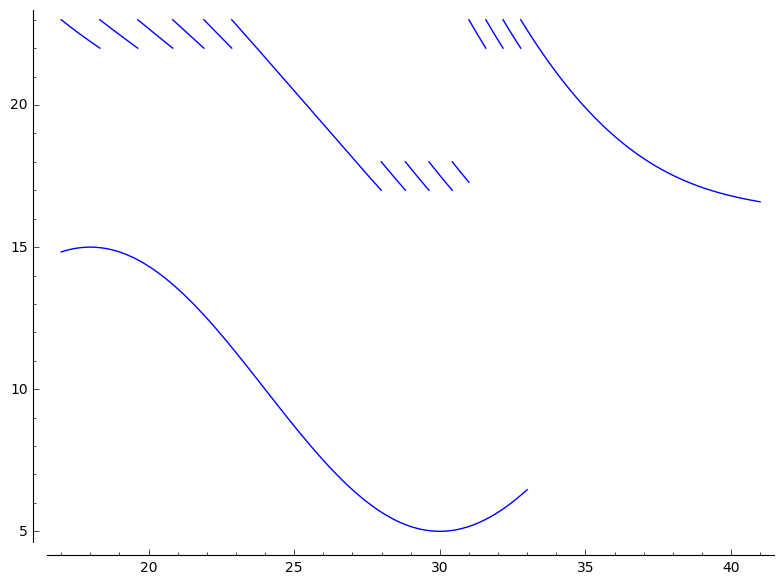

In [161]:
show(sum(graficsTemperatura)+plot(Te,17,24+9)+plot(evolucionLibre,tA,17+24))

16.5940200579599

14.8296291314453

###### Encendré la calefacció infinitament lo suficient per arribar fins a 24

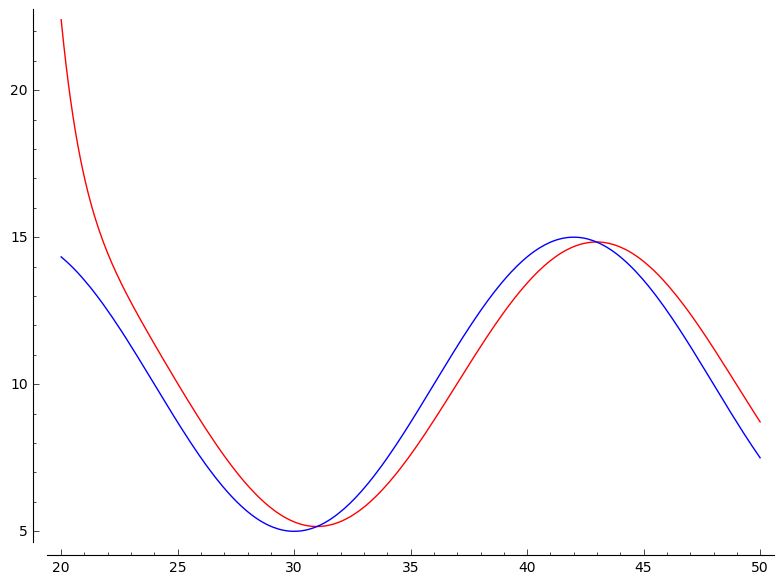

225.791174336608

6.46446609406726

# si en comptes de 24 arribo fins a 23


Ja no arribem a 22 graus més


19.95744171927145

131.174967496804

Ja no arribem a 22 graus més


751

# ara provo un altre model de q

In [488]:
def calor(T):
    return 3*(23-T)*(unit_step(T)-unit_step(T-23))
def integrarPunts(l,stepSize):
    area=0
    for i in range(len(l)-1):
        area+=(l[i][1]+l[i+1][1])/2
    return area*stepSize
        
stepSize=.05

In [489]:
from matplotlib import pyplot
s=plot(calor,0,30).matplotlib()
pyplot.savefig('a.png')

In [490]:
eq=diff(T(t),t)==(calor(T(t))-k*(T(t)-Te(t)))
sol2=desolve_rk4(eq, T, step=stepSize, ics=[15,Te(15)],end_points=24+9)

In [491]:
q2=[(i[0],calor(i[1])) for i in sol]

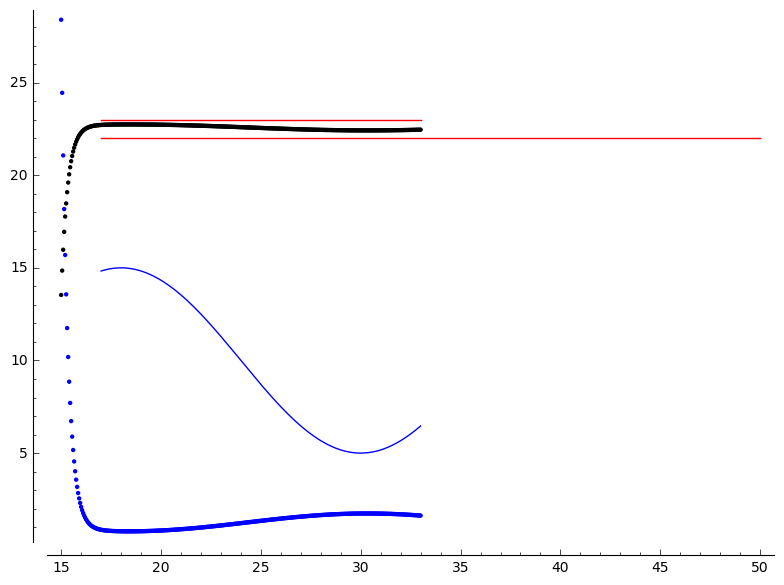

In [298]:
show(points(sol,color='black')+points(q)+plot(22,17,50,color='red')+plot(Te,17,33)+plot(23,17,33,color='red'))

In [299]:
integrarPunts(q,stepSize).n() #energia gastada

31.2974211566150

# refinament de l'anterior fent que q depengui de temps if 15<t<23 or 7+24<t<9+24:
        
        return 3*(23-T)*(unit_step(T)-unit_step(T-23))
    elif 23<t<7+24:
        return 3*(18-T)*(unit_step(T)-unit_step(T-18))
    else:
        return 0

In [509]:
def calor(t,T):
    return 3*(23-T)*(unit_step(T)-unit_step(T-23))*(unit_step(t-15)-unit_step(t-23)+unit_step(t-31)-unit_step(t-33)) +   3*(18-T)*(unit_step(T)-unit_step(T-18))*(unit_step(t-23)-unit_step(t-31))


In [513]:
eq=diff(T(t),t)==calor(t,T(t))-k*(T(t)-Te(t))
sol=desolve_rk4(eq, T, step=stepSize, ics=[15,17],end_points=24+15)

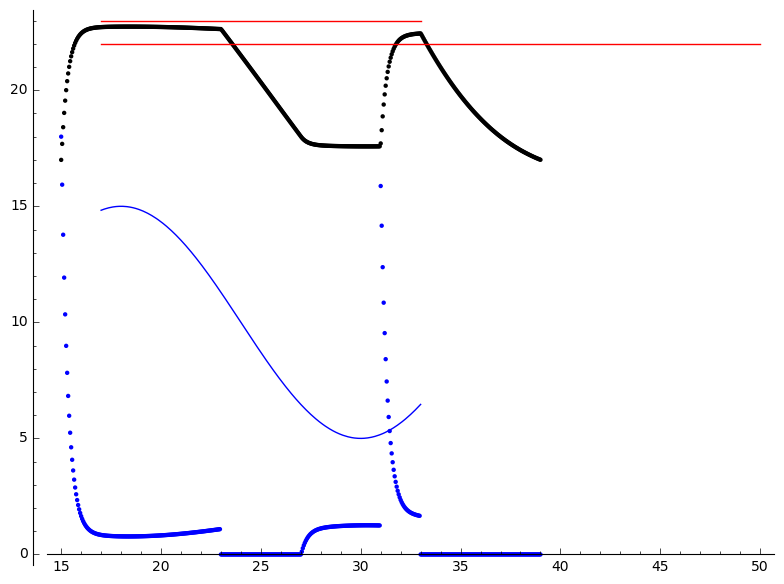

In [514]:
q=[(i[0],calor(i[0],i[1])) for i in sol]
show(points(sol,color='black')+points(q)+plot(22,17,50,color='red')+plot(Te,17,33)+plot(23,17,33,color='red'))

In [369]:
integrarPunts(q,stepSize).n() #energia gastada

28.8219052516626

In [348]:
for i in range(30):
    print("i val {} i lo atre{}".format(i,calor(24,i)))

i val 0 i lo atre54
i val 1 i lo atre51
i val 2 i lo atre48
i val 3 i lo atre45
i val 4 i lo atre42
i val 5 i lo atre39
i val 6 i lo atre36
i val 7 i lo atre33
i val 8 i lo atre30
i val 9 i lo atre27
i val 10 i lo atre24
i val 11 i lo atre21
i val 12 i lo atre18
i val 13 i lo atre15
i val 14 i lo atre12
i val 15 i lo atre9
i val 16 i lo atre6
i val 17 i lo atre3
i val 18 i lo atre0
i val 19 i lo atre0
i val 20 i lo atre0
i val 21 i lo atre0
i val 22 i lo atre0
i val 23 i lo atre0
i val 24 i lo atre0
i val 25 i lo atre0
i val 26 i lo atre0
i val 27 i lo atre0
i val 28 i lo atre0
i val 29 i lo atre0


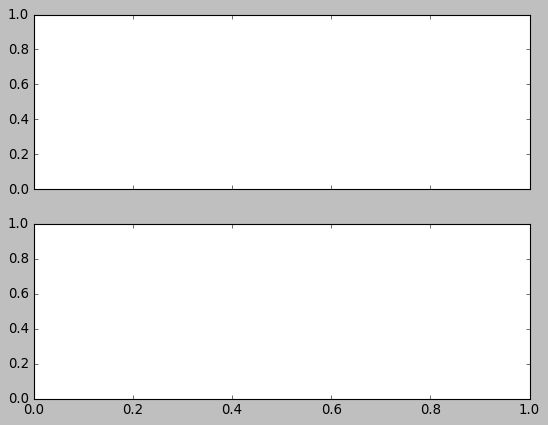

In [390]:
l=list(map(lambda x: evolucionLibre(x).n(),srange(0,100,1)))

/home/miquel/Descargas/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.
  from ipykernel.kernelapp import IPKernelApp


(0, 23)

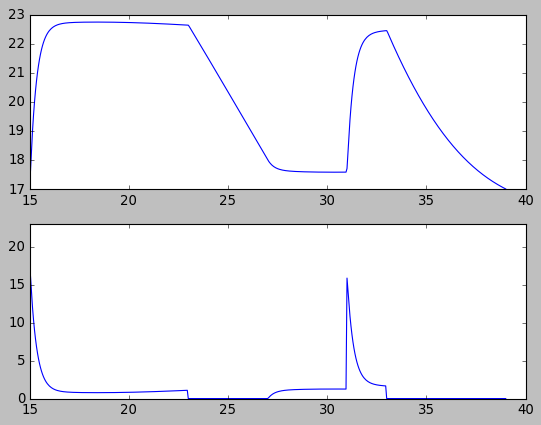

In [518]:
from matplotlib import pyplot as plt
fig1,axs=plt.subplots(2,1)
A=axs[0]
B=axs[1]
A.plot(zip(*sol)[0],zip(*sol)[1])
A.plot(srange(15,33,0.05),Tambient)
B.plot(zip(*q)[0],zip(*q)[1])
A.set_ylim(17,23)
B.set_ylim(0,23)

TypeError: <lambda>() takes exactly 1 argument (2 given)

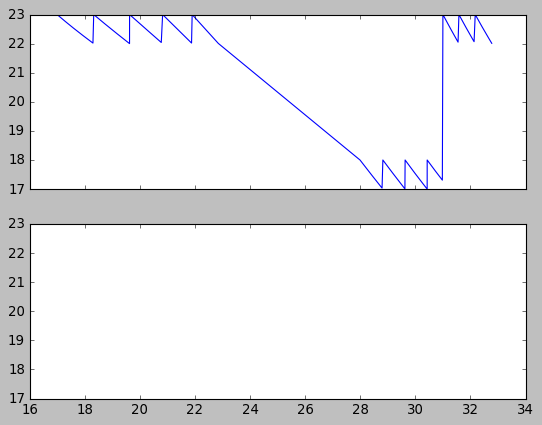

In [507]:
ttt=[]
for i in punts:
    ttt+=i
from matplotlib import pyplot as plt
fig1,axs=plt.subplots(2,1,sharex=True,sharey=True)
A=axs[0]

A.plot(zip(*ttt)[0],zip(*ttt)[1])
A.plot(srange(17,33,0.05),list(map(lambda x: Te,srange(17,33,0.05),Tambient)))


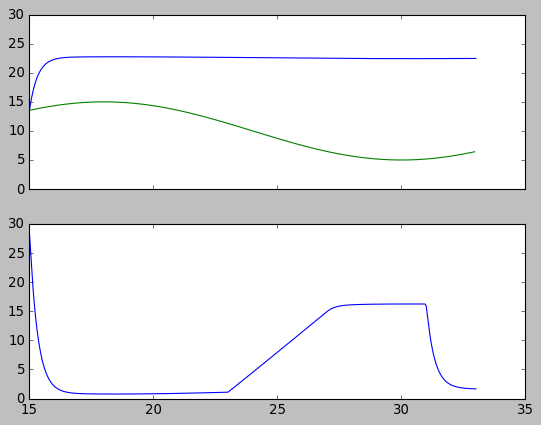

In [502]:
from matplotlib import pyplot as plt
fig1,axs=plt.subplots(2,1,sharex=True,sharey=True)
A=axs[0]
B=axs[1]
A.plot(zip(*sol2)[0],zip(*sol2)[1])
A.plot(srange(15,33,0.05),Tambient)
B.plot(zip(*q2)[0],zip(*q2)[1])

In [501]:
Tambient=list(map(lambda x: Te(x) ,srange(15,33,0.05)))

In [437]:
ppunts

[(1, 2), (23, 3)]

In [440]:
ppunts

[(1, 2), (23, 3)]

In [465]:
len(punts)

24

In [473]:
len(punts)

24

In [469]:
ppunts=[]
for i in punts:
    ppunts.append(i)

In [470]:
len(ppunts)

12

In [471]:
ppunts

[Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive,
 Graphics object consisting of 1 graphics primitive]

In [480]:
ttt

[(17.0000000000000, 23.0000000000000),
 (17.0500000000000, 22.9592916946060),
 (17.1000000000000, 22.9188667722876),
 (17.1500000000000, 22.8787196714386),
 (17.2000000000000, 22.8388448451349),
 (17.2500000000000, 22.7992367617740),
 (17.3000000000000, 22.7598899057139),
 (17.3500000000000, 22.7207987779104),
 (17.4000000000000, 22.6819578965536),
 (17.4500000000000, 22.6433617977025),
 (17.5000000000000, 22.6050050359182),
 (17.5500000000000, 22.5668821848956),
 (17.6000000000000, 22.5289878380932),
 (17.6500000000000, 22.4913166093610),
 (17.7000000000000, 22.4538631335661),
 (17.7500000000000, 22.4166220672172),
 (17.8000000000000, 22.3795880890854),
 (17.8500000000000, 22.3427559008239),
 (17.9000000000000, 22.3061202275844),
 (17.9500000000000, 22.2696758186318),
 (18.0000000000000, 22.2334174479548),
 (18.0500000000000, 22.1973399148757),
 (18.1000000000000, 22.1614380446552),
 (18.1500000000000, 22.1257066890957),
 (18.2000000000000, 22.0901407271408),
 (18.2500000000000, 22.05